<a href="https://colab.research.google.com/github/zukhrafarshadz-sudo/MyProject/blob/main/ST20318986_CMP7005_Prac1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## Programming for Data Analysis and Visualisation
### Assessment (Indian Air Pollution Data)


### **🎯 Objective :**

The objective of this project is to analyse India’s air quality data and build a complete end-to-end machine learning workflow. This includes importing and merging the dataset, performing exploratory data analysis, cleaning and preprocessing the data, developing an AQI prediction model, and creating a simple multi-page GUI application to present results.
The project also aims to use GitHub for version control by maintaining a well-organised repository with regular commits and documentation.

# 🧭 Task 1 - Data Handling


## Importing the Required Libraries

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import os
import glob

## Mounting the drive

In [198]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.


In [199]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [200]:
%cd '/content/drive/MyDrive/week5_datavisulisation/Assessment Data-20251027'
# my drive path where the file is saved in my drive

/content/drive/MyDrive/week5_datavisulisation/Assessment Data-20251027


In [201]:
%ls # it shows all the content of your folder if done properly

Ahmedabad_data.csv       Chennai_data.csv     Kochi_data.csv
Aizawl_data.csv          Coimbatore_data.csv  Kolkata_data.csv
all_cities_combined.csv  Delhi_data.csv       Lucknow_data.csv
Amaravati_data.csv       Ernakulam_data.csv   Mumbai_data.csv
Amritsar_data.csv        Gurugram_data.csv    Patna_data.csv
Bengaluru_data.csv       Guwahati_data.csv    Shillong_data.csv
Bhopal_data.csv          Hyderabad_data.csv   Talcher_data.csv
Brajrajnagar_data.csv    Jaipur_data.csv      Thiruvananthapuram_data.csv
Chandigarh_data.csv      Jorapokhar_data.csv  Visakhapatnam_data.csv


##  Combining all the csv files

In [202]:
all_cities_data = []

city_files = glob.glob("*_data.csv") # Finding all the files that end with _data.csv
for file_name in city_files:
    city_df = pd.read_csv(file_name) # Reading the CSV file into a data frame
    # Adding city's data to a list
    all_cities_data.append(city_df)

    print(f"Loaded: {file_name}")

# Combining all city data into one big table
combined_data = pd.concat(all_cities_data, ignore_index=True)

# Saving the combined data to a new CSV file
combined_data.to_csv("all_cities_combined.csv", index=False)

print(f"SUCCESS: Combined {len(city_files)} city files into one file with {len(combined_data)} total rows")
print("The combined file is saved as: all_cities_combined.csv")


Loaded: Delhi_data.csv
Loaded: Brajrajnagar_data.csv
Loaded: Gurugram_data.csv
Loaded: Chennai_data.csv
Loaded: Hyderabad_data.csv
Loaded: Jaipur_data.csv
Loaded: Patna_data.csv
Loaded: Bhopal_data.csv
Loaded: Mumbai_data.csv
Loaded: Jorapokhar_data.csv
Loaded: Ernakulam_data.csv
Loaded: Thiruvananthapuram_data.csv
Loaded: Ahmedabad_data.csv
Loaded: Kochi_data.csv
Loaded: Amritsar_data.csv
Loaded: Lucknow_data.csv
Loaded: Visakhapatnam_data.csv
Loaded: Chandigarh_data.csv
Loaded: Bengaluru_data.csv
Loaded: Talcher_data.csv
Loaded: Shillong_data.csv
Loaded: Kolkata_data.csv
Loaded: Guwahati_data.csv
Loaded: Aizawl_data.csv
Loaded: Amaravati_data.csv
Loaded: Coimbatore_data.csv
SUCCESS: Combined 26 city files into one file with 29531 total rows
The combined file is saved as: all_cities_combined.csv


##  Fundamental Data Understanding to gain general insight:

In [203]:
df= pd.read_csv('all_cities_combined.csv')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Delhi,01/01/2015,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
1,Delhi,02/01/2015,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
2,Delhi,03/01/2015,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
3,Delhi,04/01/2015,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
4,Delhi,05/01/2015,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Coimbatore,27/06/2020,11.81,15.08,NaN,40.84,23.43,2.49,0.57,6.04,15.42,0.00,0.00,NaN,34.0,Good
29527,Coimbatore,28/06/2020,14.04,16.03,NaN,44.77,26.75,2.63,0.57,5.88,11.45,0.00,0.00,NaN,32.0,Good
29528,Coimbatore,29/06/2020,16.26,20.81,NaN,49.22,31.02,2.01,0.61,6.19,10.09,0.00,0.00,NaN,41.0,Good
29529,Coimbatore,30/06/2020,14.21,15.69,NaN,39.15,20.83,1.72,0.59,5.59,13.85,0.00,0.00,NaN,33.0,Good


In [204]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Delhi,01/01/2015,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
1,Delhi,02/01/2015,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
2,Delhi,03/01/2015,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
3,Delhi,04/01/2015,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
4,Delhi,05/01/2015,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor


In [205]:
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Coimbatore,27/06/2020,11.81,15.08,NaN,40.84,23.43,2.49,0.57,6.04,15.42,0.0,0.0,NaN,34.0,Good
29527,Coimbatore,28/06/2020,14.04,16.03,NaN,44.77,26.75,2.63,0.57,5.88,11.45,0.0,0.0,NaN,32.0,Good
29528,Coimbatore,29/06/2020,16.26,20.81,NaN,49.22,31.02,2.01,0.61,6.19,10.09,0.0,0.0,NaN,41.0,Good
29529,Coimbatore,30/06/2020,14.21,15.69,NaN,39.15,20.83,1.72,0.59,5.59,13.85,0.0,0.0,NaN,33.0,Good
29530,Coimbatore,01/07/2020,NaN,NaN,NaN,46.03,27.57,NaN,0.57,5.73,10.59,0.0,0.0,NaN,NaN,NaN


In [206]:
df.shape
print(f'No of Rows: {df.shape[0]}, No of Columns: {df.shape[1]}')

No of Rows: 29531, No of Columns: 16


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [208]:
df.dtypes

,0
City,object
Date,object
PM2.5,float64
PM10,float64
NO,float64
NO2,float64
NOx,float64
NH3,float64
CO,float64
SO2,float64


In [209]:
#df = df.drop('No' , axis=1)
#df.head()


In [210]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

## **Inference:**

The combined dataset contains daily air-quality records collected from multiple Indian cities, covering a range of pollutants such as PM2.5, PM10, NO₂, NOx, CO, SO₂, O₃, and several volatile compounds. Most columns appear complete, but some pollutants—especially PM10, NH3, and Xylene—show moderate missing values, indicating gaps in measurements for certain days or locations. The dataset also includes categorical fields like City and AQI_Bucket, along with a Date column that was successfully converted for further time-based analysis.

Overall, the dataset is well-structured with enough valid entries to perform reliable data cleaning, exploratory analysis, and AQI modelling. Despite a few missing values, the high volume of observations provides a strong foundation for identifying pollution trends and building predictive models.

### Total number of stations in the dataset:

In [211]:
cities = df['City'].value_counts()
print(f'Total number of cities in the dataset : {len(cities)}')
cities


Total number of cities in the dataset : 26


,count
City,
Delhi,2009
Chennai,2009
Mumbai,2009
Bengaluru,2009
Lucknow,2009
Ahmedabad,2009
Hyderabad,2006
Patna,1858
Gurugram,1679


In [212]:
# Checking if the cities are unique
df['City'].unique()

array(['Delhi', 'Brajrajnagar', 'Gurugram', 'Chennai', 'Hyderabad',
       'Jaipur', 'Patna', 'Bhopal', 'Mumbai', 'Jorapokhar', 'Ernakulam',
       'Thiruvananthapuram', 'Ahmedabad', 'Kochi', 'Amritsar', 'Lucknow',
       'Visakhapatnam', 'Chandigarh', 'Bengaluru', 'Talcher', 'Shillong',
       'Kolkata', 'Guwahati', 'Aizawl', 'Amaravati', 'Coimbatore'],
      dtype=object)

In [213]:
# Checking if the dates are unique
df['Date'].unique()

array(['01/01/2015', '02/01/2015', '03/01/2015', ..., '29/06/2020',
       '30/06/2020', '01/07/2020'], dtype=object)

In [214]:
#Checking any duplicate entries in the dataset
print(f"There are {df.duplicated().sum()} duplicates in the dataset")

There are 0 duplicates in the dataset


## **Data Understanding Results**


*   The merged dataset contains 29,531 total records with 16 columns, representing daily air-quality measurements from multiple Indian cities.
*   The data covers a time range from January 1, 2015 to July 1, 2020, allowing analysis across several years.


*   The dataset includes various pollutant concentrations such as PM2.5, PM10, NO, NO₂, NOx, NH₃, CO, SO₂, O₃, Benzene, Toluene, and Xylene, along with the overall AQI and AQI_Bucket.


*   Each row corresponds to the air-quality readings for a specific city on a specific date.



*   Most columns are numerical (float or integer), while City and AQI_Bucket are categorical.
*   The Date column was successfully converted into a datetime format, enabling time-based analysis.

*   Some pollutant columns contain missing values, but the dataset overall is consistent and suitable for EDA and modelling.

### Displaying the percentage of missing value

In [215]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * mis_val / len(df)

    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    mis_val_table = mis_val_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'})

    # Sorting the table by percentage of missing descending
    mis_val_table = mis_val_table.sort_values('% of Total Values', ascending=False)

    return mis_val_table

missing_values = missing_values_table(df)
display(missing_values.style.background_gradient(cmap='Blues'))

,Missing Values,% of Total Values
Xylene,18109,61.322001
PM10,11140,37.723071
NH3,10328,34.973418
Toluene,8041,27.229014
Benzene,5623,19.041008
AQI,4681,15.851139
AQI_Bucket,4681,15.851139
PM2.5,4598,15.570079
NOx,4185,14.171549
O3,4022,13.619586


## **Inferences:**

The dataset shows the highest missing values in Xylene (61%), followed by PM10 (38%), NH₃ (35%), Toluene (27%), and Benzene (19%). Several key pollutant columns such as AQI, AQI_Bucket, PM2.5, NOx, O₃, SO₂, and NO₂ also contain moderate missingness in the range of 12–16%. In contrast, CO has comparatively fewer missing values at around 7%. The Date and City columns have no missing entries, ensuring complete information for time and location. Overall, while some pollutant readings are incomplete, the dataset remains usable with appropriate preprocessing.

## Visulalizing the missing values using Heatmap and table

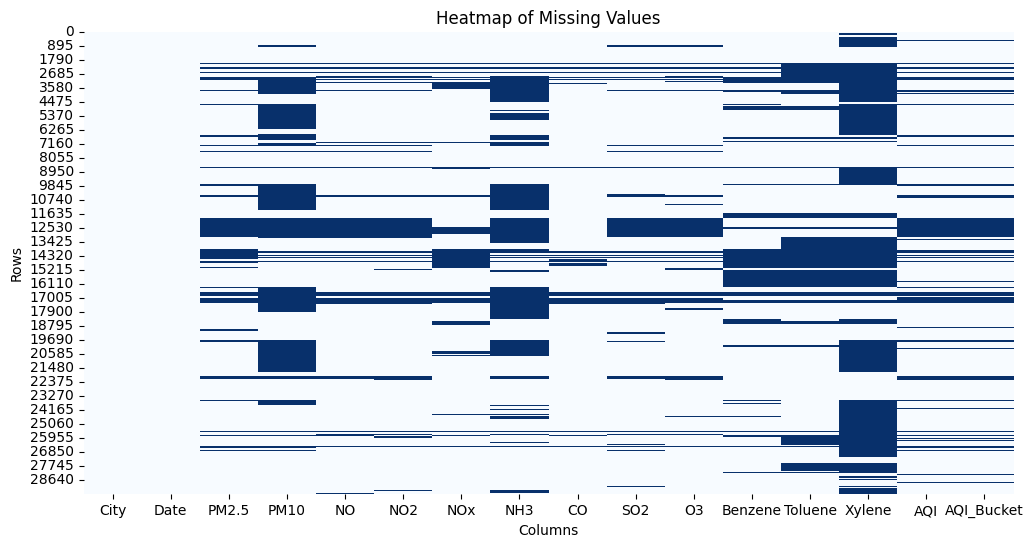

In [216]:
# Visaulizing the missing values using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="Blues")
plt.title("Heatmap of Missing Values")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()


In [217]:
missing_values_per_city = df.groupby('City').apply(lambda x: x.isnull().sum())
missing_values_per_city


/tmp/ipython-input-353253830.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
City,,,,,,,,,,,,,,,,
Ahmedabad,0,0,628,1602,609,608,594,2009,609,640,685,483,483,484,675,675
Aizawl,0,0,2,1,0,0,0,0,0,0,9,15,15,113,2,2
Amaravati,0,0,59,55,55,55,55,55,97,65,55,75,75,269,110,110
Amritsar,0,0,128,63,93,44,289,42,76,168,115,195,212,213,95,95
Bengaluru,0,0,146,360,6,6,4,203,11,6,144,266,93,2009,99,99
Bhopal,0,0,9,9,9,9,9,9,9,9,9,289,289,289,11,11
Brajrajnagar,0,0,185,173,243,234,175,226,150,193,203,173,938,938,225,225
Chandigarh,0,0,15,0,4,4,4,10,0,0,0,0,0,0,5,5
Chennai,0,0,117,1707,36,36,36,462,25,36,49,285,253,2009,125,125


## **Inference:**

The table shows that missing data is unevenly distributed across cities and pollutant variables. While City and Date contain no missing values, several pollutants show large gaps depending on the city.


*   For example, pollutants such as PM10, NOx, NH₃, Toluene, Benzene, and Xylene have a high number of missing entries across many cities, indicating inconsistent monitoring or sensor unavailability.
*   In contrast, cities like Delhi, Aizawl, and Kochi show fewer readings overall, contributing to lower pollutant coverage.


*   Some cities—such as Mumbai, Lucknow, and Kolkata—show relatively high counts of missing data across multiple pollutants, suggesting incomplete or irregular reporting.
*   Meanwhile, a few cities such as Bhopal and Aizawl record very limited measurements for many pollutants, reflecting data scarcity rather than sensor failure.

*  Overall, the distribution indicates that missingness varies substantially between cities, and these gaps will need to be addressed during preprocessing to ensure balanced and reliable analysis.

## Calculating Missing values per cities


In [218]:
print("Total missing values per city:")
print(df.groupby('City').apply(lambda x: x.isnull().sum().sum()))


Total missing values per city:
City
Ahmedabad             10784
Aizawl                  159
Amaravati              1190
Amritsar               1828
Bengaluru              3452
Bhopal                  970
Brajrajnagar           4281
Chandigarh               47
Chennai                5301
Coimbatore              693
Delhi                  1087
Ernakulam               275
Gurugram               6843
Guwahati               1033
Hyderabad              1583
Jaipur                 1416
Jorapokhar             8603
Kochi                   356
Kolkata                 816
Lucknow                6082
Mumbai                14201
Patna                  6214
Shillong               1073
Talcher                4014
Thiruvananthapuram     3805
Visakhapatnam          2382
dtype: int64


/tmp/ipython-input-1767600658.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



## **Inference:**



*   The total missing values per city show that data completeness varies significantly across locations.
*   Mumbai (14,201), Ahmedabad (10,784), and Jorapokhar (8,603) have the highest number of missing entries, indicating larger gaps in measurements—possibly due to inconsistent monitoring, sensor issues, or irregular reporting.



*   Cities such as Gurugram (6,843), Lucknow (6,082), and Chennai (5,301) also show substantial missing data, suggesting fluctuating data availability.
*   In contrast, some cities like Chandigarh (47), Aizawl (159), Ernakulam (275), and Kochi (356) have very few missing values, indicating more reliable and consistent data collection.

*   Overall, the variation in missing values suggests that data quality differs geographically, with some cities maintaining stronger reporting consistency than others.



## Handling Missing Values:

In [219]:
df[['Xylene','PM10','NH3','Toluene','Benzene','AQI','AQI_Bucket','PM2.5','NOx','O3','SO2','NO2','NO','CO','Date','City']] = df[['Xylene','PM10','NH3','Toluene','Benzene','AQI','AQI_Bucket','PM2.5','NOx','O3','SO2','NO2','NO','CO','Date','City']].ffill()

## Inference:

The forward-fill (ffill) method was used to replace missing values by carrying forward the last available reading. This works well for our air-quality dataset because pollutant measurements are recorded in a continuous sequence, and missing values usually occur when sensors skip a reading for a short period. By filling gaps with the previous valid value, the overall trend of pollution levels remains consistent without creating sudden drops or unrealistic spikes. This makes the dataset cleaner and more stable for further analysis, especially for time-based visualisations and modelling.

## Checking again if there's any missing value

In [220]:
print("Total missing values per city:")
print(df.groupby('City').apply(lambda x: x.isnull().sum().sum()))


Total missing values per city:
City
Ahmedabad             0
Aizawl                0
Amaravati             0
Amritsar              0
Bengaluru             0
Bhopal                0
Brajrajnagar          0
Chandigarh            0
Chennai               0
Coimbatore            0
Delhi                 0
Ernakulam             0
Gurugram              0
Guwahati              0
Hyderabad             0
Jaipur                0
Jorapokhar            0
Kochi                 0
Kolkata               0
Lucknow               0
Mumbai                0
Patna                 0
Shillong              0
Talcher               0
Thiruvananthapuram    0
Visakhapatnam         0
dtype: int64


/tmp/ipython-input-1767600658.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



## **Infernece:**


The updated table shows that all cities now have zero missing values across every column. This confirms that the forward-fill method successfully filled all previously missing entries in the dataset. As a result, each city now has complete and continuous air-quality records, making the dataset fully prepared for further stages such as EDA, feature engineering, and modelling. This also ensures that no city contributes incomplete data, improving the overall reliability of the analysis.


## checking using Heatmap

<Axes: >

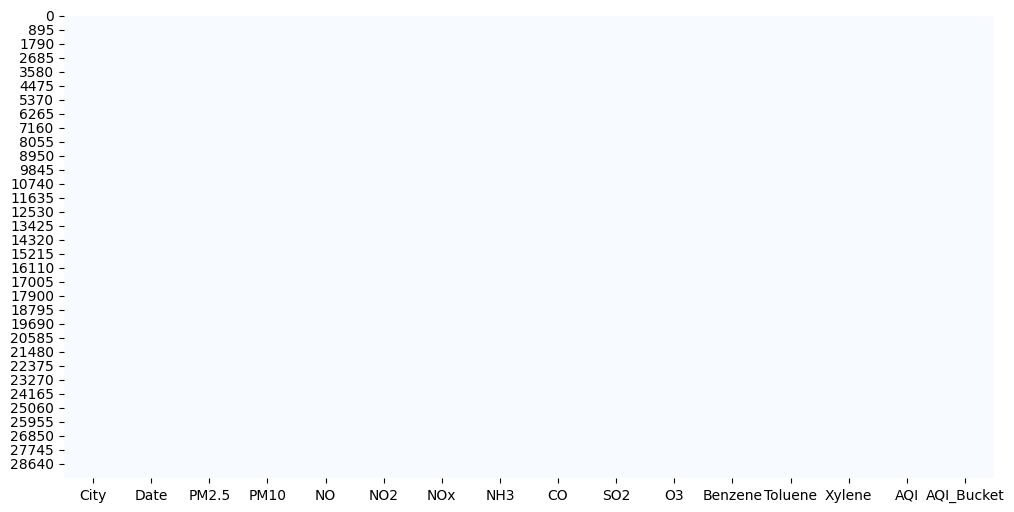

In [221]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="Blues")

## **Statistical inference from the data set:**

In [222]:
df.describe().T #transposing the table

,count,mean,std,min,25%,50%,75%,max
PM2.5,29531.0,64.382375,65.113052,0.04,24.775,45.35,78.620,949.99
PM10,29531.0,108.110006,81.713275,0.01,50.390,99.16,139.260,1000.00
NO,29531.0,16.930136,23.388285,0.02,5.190,9.28,18.560,390.68
NO2,29531.0,26.553109,23.925281,0.01,10.475,19.72,35.030,362.21
NOx,29531.0,33.448805,33.562234,0.00,13.710,24.09,38.660,467.63
NH3,29531.0,22.136614,25.738585,0.01,8.050,16.87,24.580,352.89
CO,29531.0,2.292707,6.824272,0.00,0.500,0.91,1.490,175.81
SO2,29531.0,15.887874,20.507173,0.01,5.760,9.64,15.840,193.86
O3,29531.0,34.537162,21.835760,0.01,18.670,31.48,47.330,257.73
Benzene,29531.0,3.176544,15.981103,0.00,0.050,0.78,2.750,455.03


## 📊 **Statistical Inference:**

 📌 Count

Each pollutant column contains 29,531 valid observations, meaning the dataset is complete after imputation and ready for analysis.

---

📌 Mean

The mean indicates the average pollutant concentration across all cities:


*   PM2.5 ≈ 64.38 µg/m³ → Moderately high fine particulate pollution.
*   PM10 ≈ 108.11 µg/m³ → High coarse particulate pollution, suggesting dust and industrial activity.

*   NO2 ≈ 26.55 µg/m³ & NOx ≈ 33.44 µg/m³ → Reflect traffic-related emissions.
*   SO2 ≈ 15.89 µg/m³ & O3 ≈ 34.54 µg/m³ → Moderate gaseous pollutant levels.


*   AQI ≈ 162.97 → Indicates overall Moderate to Poor air quality.


---

📌 Min and Max

These values show the range of pollution levels:



*   PM2.5 ranges from 0.04 to 949 µg/m³
→ Shows extremely clean days as well as very severe pollution spikes.
*   PM10 ranges from 0.01 to 1000 µg/m³
→ Indicates large fluctuations and very high dust/particulate days.


*   O3 ranges from 0.01 to 257 µg/m³,
while CO ranges from 0 to 175, showing varying atmospheric conditions.

  Overall, the wide ranges suggest that pollution varies heavily between cities and across days.



---


📌 25%, 50%, 75% (Quartiles)

These values describe how pollution levels are spread:

**PM2.5:**



*   25%: 24.7 µg/m³

*   50%: 45.35 µg/m³
*   75%: 78.6 µg/m³

     → PM2.5 is often elevated, with many days in moderate-to-unhealthy ranges.

**PM10:**



*   25%: 50.39 µg/m³

*   50%: 99.16 µg/m³

*  75%: 139.26 µg/m³
   
   → Shows consistently higher particulate matter across the dataset.


These quartiles confirm that pollution levels frequently exceed national and international safety guidelines.



---

📌 STD(Standard Deviation)

This shows how much values vary around the mean:



*   PM2.5 std ≈ 65.1 and PM10 std ≈ 81.7
→ Very high variation, meaning pollution levels fluctuate widely across locations.

*   NO2 std ≈ 23.9 and SO2 std ≈ 20.5
→ Moderate variability.
*   AQI std ≈ 138.4
→ Large spread—some days are very clean while others reach severe pollution levels.


---
🌎 General Interpretation



*   LAir-quality indicators (PM2.5, PM10, NO2, NOx, CO) show high mean values and large variability, indicating frequent pollution fluctuations across cities.

*   Pollutants with extremely high maximum values suggest occasional severe pollution events, likely due to traffic, industry, dust storms, or seasonal burning.
*  The wide range between quartiles confirms that many cities experience poor air quality for a significant portion of the year.


*   Overall, the dataset reflects heterogeneous pollution patterns across India, with substantial daily and city-to-city variation.


## **Data Visualization**

## Plot of Original Dataset

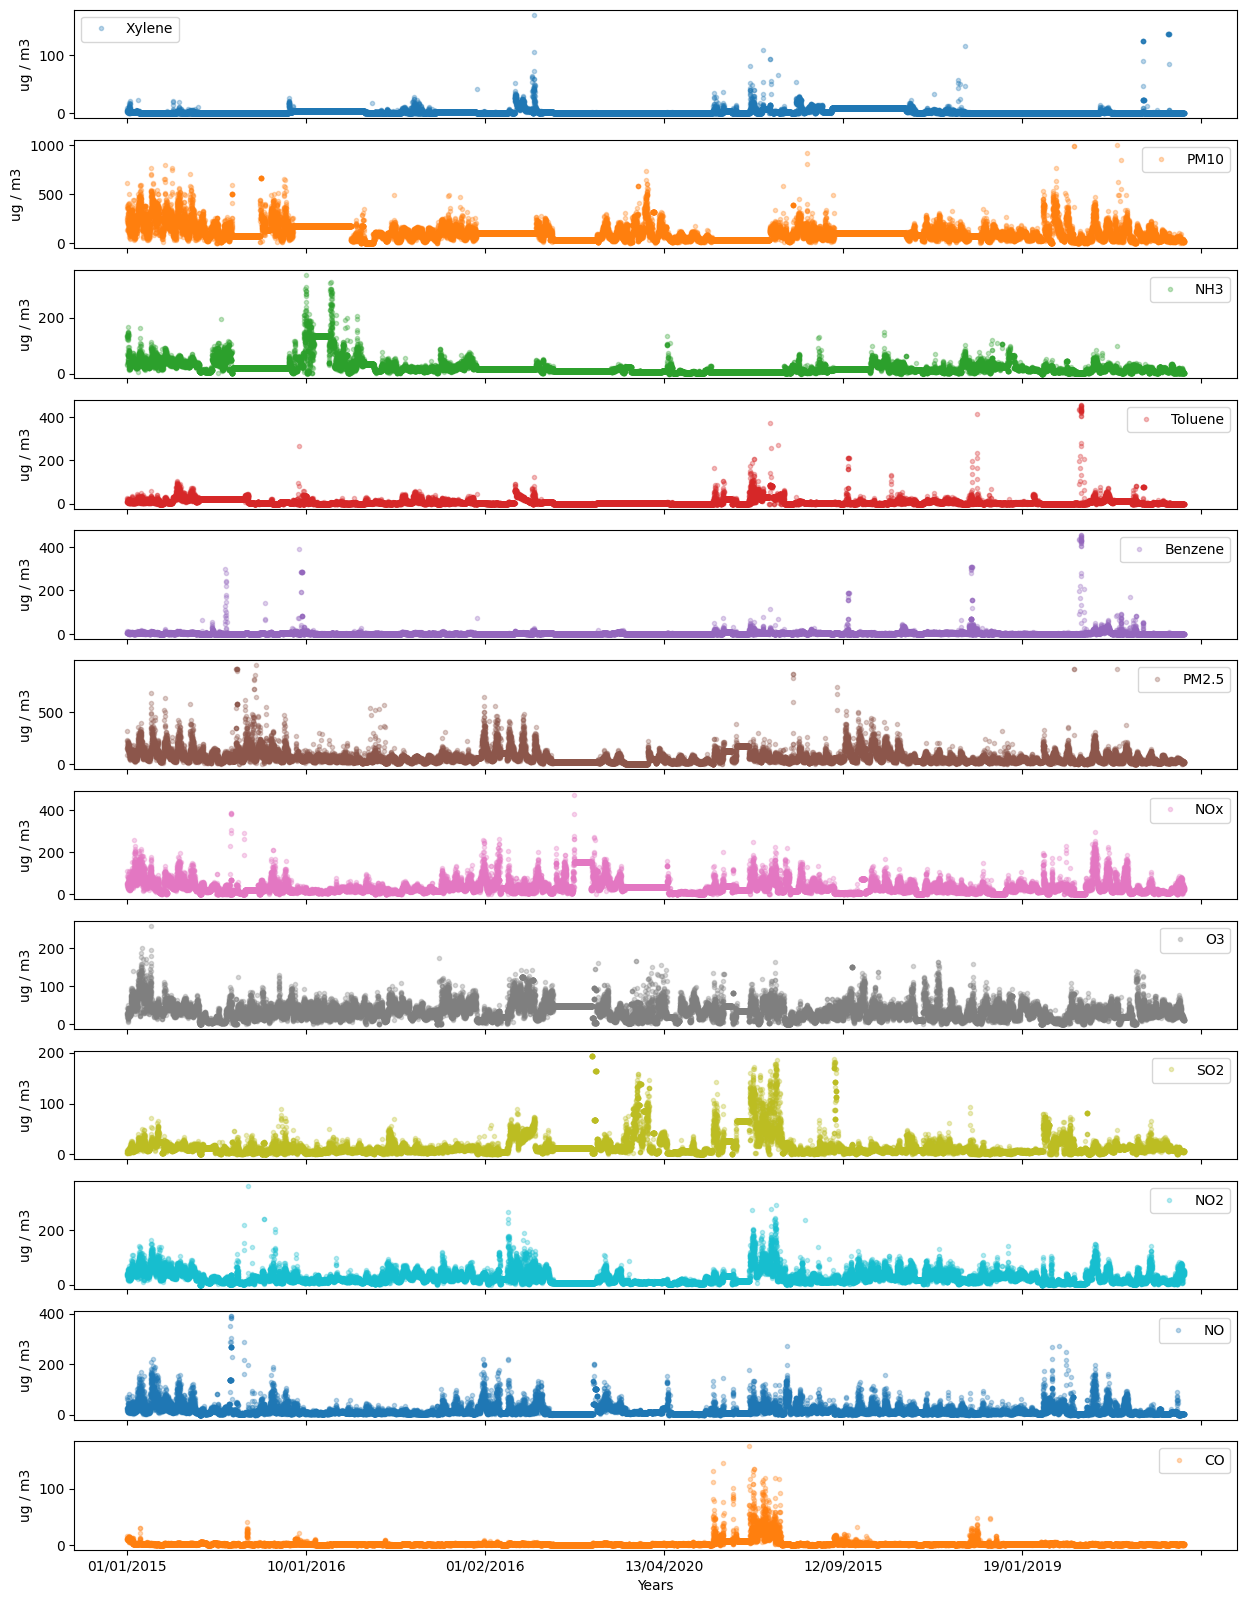

In [223]:
Pollutants = ['Xylene','PM10','NH3','Toluene','Benzene','PM2.5','NOx','O3','SO2','NO2','NO','CO']
df.set_index('Date', inplace=True)
axes = df[Pollutants].plot(marker='.', alpha=0.3, linestyle='None', subplots=True, figsize=(15, 20))
for ax in axes:
    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')


## Creating a Stacked Bar Chart to Compare Average Pollution levels across Cities


In [226]:
import plotly.express as px
cities_stats = df.groupby('City')[['Xylene','PM10','NH3','Toluene','Benzene','PM2.5','NOx','O3','SO2','NO2','NO','CO']].mean().reset_index()

#Melting the dataframe to create a 'polutant' column
cities_stats_melted = pd.melt(cities_stats, id_vars=['City'], value_vars=['Xylene','PM10','NH3','Toluene','Benzene','PM2.5','NOx','O3','SO2','NO2','NO','CO'], var_name='Pollutant', value_name='Average Concentration')

#Creating the stacked bar chart
color_map = {
    'Xylene': '#1f77b4',
    'PM10': '#ff7f0e',
    'NH3': '#2ca02c',
    'Toluene': '#d62728',
    'Benzene': '#9467bd',
    'PM2.5': '#e377c2',
    'NOx': '#7f7f7f',
    'O3': '#bcbd22',
    'SO2': '#17becf',
    'NO2': '#1abc9c',
    'NO': '#9b59b6',
    'CO': '#34495e'
}
fig_cities = px.bar(cities_stats_melted, x='City', y='Average Concentration', color='Pollutant', barmode='stack',
                    title='Average Pollution Levels Across Cities',
                    labels={'Average Concentration': 'Average Concentration (ug/m³)', 'City': 'City'},
                    color_discrete_map=color_map) #this will assign unique colour to each pollutant
fig_cities.show()



## Pollutants Summary:



*   PM10 and PM2.5: The most dominant pollutants across all cities, indicating high particulate matter exposure.
*   NOx, NO₂ and CO: Higher in major urban centers, showing strong influence from traffic and combustion activities.


*   O₃: Relatively steady across locations compared to other pollutants.
*   Benzene, Toluene and Xylene: Present in smaller amounts, reflecting limited VOC-related emissions.



## Cities Summary:



*   **Most Polluted:**
Delhi, Patna, Gurugram, Lucknow, and Mumbai show the highest overall pollutant levels, mainly due to dense population and heavy vehicle use.
*   **Least Polluted:**
Aizawl, Ernakulam, Kochi, and Shillong display much lower concentrations, indicating cleaner air and fewer pollution sources.




## In a Nutshell:

Air pollution is significantly higher in large metropolitan cities, while smaller or coastal regions maintain comparatively cleaner air.

